# SI 370 - Homework 2 - Visualization of Olympic Data

### Kelsey Toporski - ktops

#### Data source: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results#athlete_events.csv

In [1]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt

import seaborn as sns

from bokeh.plotting import figure

from bokeh.layouts import layout
from bokeh.layouts import widgetbox

from bokeh.embed import file_html

from bokeh.io import show
from bokeh.io import output_notebook
output_notebook()

from bokeh.models import Text
from bokeh.models import Plot
from bokeh.models import Slider
from bokeh.models import Circle
from bokeh.models import Range1d
from bokeh.models import CustomJS
from bokeh.models import HoverTool
from bokeh.models import LinearAxis
from bokeh.models import FactorRange
from bokeh.models import ColumnDataSource
from bokeh.models import SingleIntervalTicker

from bokeh.transform import factor_cmap

from bokeh.palettes import Spectral6

Loading BokehJS ...

In [2]:
olympics = olympics = pd.read_csv('athlete_events.csv')
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Question 1: How many medals were won by North American teams (US 🇺🇸, Canada 🇨🇦 , and Mexico 🇲🇽 ) from 2000 - 2016? How do those teams compare to each other in terms of medals won?

#### Get the data into the right format:

In [3]:
q1o = olympics.copy()

In [4]:
# only want to see data from these three countries, in this time period

# data from only this time period
q1o = q1o[q1o.Year >= 2000]
q1o = q1o[q1o.Year <= 2016]

# data from only these countries
q1o = q1o[(q1o.Team == 'United States') | (q1o.Team == 'Canada') | (q1o.Team == 'Mexico')]

In [5]:
# we will want to break this data up into the amount of medals won by each country, let's worry about the years later
us = q1o[(q1o.Team == 'United States')]
us = us.dropna(subset=['Medal'])
us_meds = us.Medal.count()

ca = q1o[(q1o.Team == 'Canada')]
ca = ca.dropna(subset=['Medal'])
ca_meds = ca.Medal.count()

mx = q1o[(q1o.Team == 'Mexico')]
mx = mx.dropna(subset=['Medal'])
mx_meds = mx.Medal.count()

print('Medals won by U.S. from 2000-2015: ' + str(us_meds))
print('Medals won by Canada from 2000-2015: ' + str(ca_meds))
print('Medals won by Mexico from 2000-2015: ' + str(mx_meds))

Medals won by U.S. from 2000-2015: 1561
Medals won by Canada from 2000-2015: 508
Medals won by Mexico from 2000-2015: 43


#### Let's visualize this with a heatmap!

In [6]:
# to make this work for a heatmap, want to get a list of lists, where the inner lists represent the countries, 
# and are filled with how many medals they wone each from from 2000-2016

# note that the olympics only happen every other year (counting winter and regular), so we will account for that

# to start, I will initialize an list of lists full of 0's, because we know the size
heat_list = [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]

# next we will fill each list with the right medal counts - this is pythonic, bear with me
year = 2000

# for the US
for i in range(9):
    year = 2000 + i*2
    us_meds_year = us[us.Year == year]
    us_meds_year_count = us_meds_year.Medal.count()
    heat_list[0][i] = us_meds_year_count
    
# for Canada
for i in range(9):
    year = 2000 + i*2
    ca_meds_year = ca[ca.Year == year]
    ca_meds_year_count = ca_meds_year.Medal.count()
    heat_list[1][i] = ca_meds_year_count
    
# for Mexico
for i in range(9):
    year = 2000 + i*2
    mx_meds_year = mx[mx.Year == year]
    mx_meds_year_count = mx_meds_year.Medal.count()
    heat_list[2][i] = mx_meds_year_count

heat_list

[[240, 70, 259, 48, 309, 89, 238, 52, 256],
 [31, 72, 17, 67, 35, 80, 55, 82, 69],
 [6, 0, 4, 0, 4, 0, 24, 0, 5]]

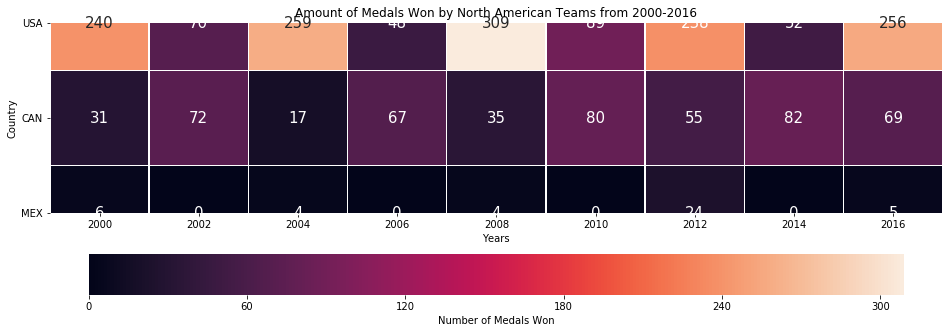

In [7]:
plt.figure(figsize = (16,5))
x_labels = [2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016]
y_labels = ['USA', 'CAN', 'MEX']
heat_map = sns.heatmap(heat_list, xticklabels=x_labels, yticklabels=y_labels, annot=True, annot_kws={"size": 15}, fmt='g', linewidths=.5, cbar_kws={'label': 'Number of Medals Won', 'orientation': 'horizontal'})
plt.xlabel("Years")
plt.ylabel("Country")
plt.title('Amount of Medals Won by North American Teams from 2000-2016')
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
plt.show()

#### This visualization shows us how many medals were won by each North American country each year, and how those teams compared against each other. We can see that while the US often dominates in the Summer Olympics, they are much more evenly matched with Canada (and even outdone by them) in the Winter Olympics. Mexico remains a non-competitive force against the US and Canada, but had a great games for themselves in 2012.

#### Let's visualize it a little differently with a bar graph.

In [8]:
years = ['2000', '2002', '2004', '2006', '2008', '2010', '2012', '2014', '2016']
teams = ['USA', 'CAN', 'MEX']

data = {'years': years,
        'USA': [240, 70, 259, 48, 309, 89, 238, 52, 256],
        'CAN': [31, 72, 17, 67, 35, 80, 55, 82, 69],
        'MEX': [6, 0, 4, 0, 4, 0, 24, 0, 5]}

x = [(year, team) for year in years for team in teams]
counts = sum(zip(data['USA'], data['CAN'], data['MEX']), ())

source = ColumnDataSource(data=dict(x=x, counts=counts))

plot = figure(x_range=FactorRange(*x), plot_height=300, plot_width=900, title="Number of Medals Won by North American Teams from 2000-2016")

plot.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",

       # use the palette to colormap based on the the x[1:2] values
       fill_color=factor_cmap('x', palette=['tomato', 'orange', 'gold'], factors=teams, start=1, end=2))

plot.y_range.start = 0
plot.x_range.range_padding = 0.1
plot.xaxis.major_label_orientation = 1
plot.xgrid.grid_line_color = None

plot.xaxis.axis_label = 'Years'
plot.yaxis.axis_label = 'Number of Medals'

show(plot)

#### Revisualizing this same data in this way helps us look at a more direct comparison between the countries. With the height of the bar representing the amount of medals won, you can see how closely matched the US and Canada are during the Winter Olympics. Mexico is also not shown well on this graph, and that makes sense in this context, as they did not win many medals in this time frame.

## Question 2: Which athlete has won the most gold medals over this time period (2000-2016), and can we map their success? Let's compare the top two athletes and their records.

#### Get the data into the right format:

In [9]:
q2o = olympics.copy()

In [10]:
# data from only this time period
q2o = q2o[q2o.Year >= 2000]
q2o = q2o[q2o.Year <= 2016]

# want to get just the people who have won gold medals
gold = q2o[q2o.Medal == 'Gold']

# want to group the rows by person
gold_people = gold.Name.value_counts()
gold_people.head(2)

Michael Fred Phelps, II    23
Usain St. Leo Bolt          8
Name: Name, dtype: int64

In [11]:
phelps = gold[gold.Name == 'Michael Fred Phelps, II']
phelps.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
187890,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Gold


In [12]:
bolt = gold[gold.Name == 'Usain St. Leo Bolt']
bolt.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
24877,13029,Usain St. Leo Bolt,M,21.0,196.0,95.0,Jamaica,JAM,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's 100 metres,Gold


In [13]:
meds_per_year_p = phelps.groupby('Year').Medal.count()
meds_per_year_p_df = pd.DataFrame(meds_per_year_p)
meds_per_year_p_df = meds_per_year_p_df.reset_index()
medal_nums_p = list(meds_per_year_p_df['Medal'])
medal_nums_p

[6, 8, 4, 5]

In [14]:
meds_per_year_b = bolt.groupby('Year').Medal.count()
meds_per_year_b_df = pd.DataFrame(meds_per_year_b)
meds_per_year_b_df = meds_per_year_b_df.reset_index()
medal_nums_b = list(meds_per_year_b_df['Medal'])
medal_nums_b

[2, 3, 3]

#### Let's visualize this journey of gold medals with a line graph:

In [15]:
# let's make a bokeh line graph with points
# x is years 2000-2016, both were only active starting in 2004, let's just start there
# y is number of medals won

x = [2004, 2008, 2012, 2016]
y = [6, 8, 4, 5]
y2 = [0, 2, 3, 3]

# create a new plot with figure
p = figure(plot_width=400, plot_height=400, title='Gold Medals Won by Top Athletes Throughout Career')

# add both a line and circles on the same plot
p.line(x, y, legend='Michael Phelps', line_width=2, color='black')
p.circle(x, y, fill_color='gold', line_color='black', size=12)

p.line(x, y2, legend='Usain Bolt', line_width=2, color='red')
p.circle(x, y2, fill_color='gold', line_color='black', size=12)

p.xaxis.axis_label = 'Years'
p.yaxis.axis_label = 'Number of Medals'

show(p) # show the results

#### This graph helps us visualize the rise and fall of these two athletes' careers. While Michael Phelps had rises and falls in his amount of medals won over this timeframe, Usain Bolt increased the amount of medals he won over time. We can also see that Michael Phelps consistently won more medals per Olympic Games than Usain Bolt.

#### Let's compare the two a little more directly with a bar graph.

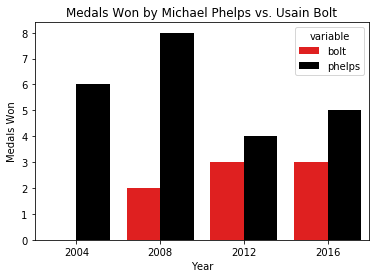

In [16]:
gold_dict = {'year': [2004, 2008, 2012, 2016], 'phelps': [6, 8, 4, 5], 'bolt': [0, 2, 3, 3]}
gold_df = pd.DataFrame.from_dict(gold_dict)

# have to restack the dataframe 
gold_df_wide = pd.melt(gold_df, id_vars=['year']).sort_values(['variable','value'])

colors = ['red', 'black']
sns.barplot(x='year', y='value', hue='variable', data=gold_df_wide, palette=colors)
plt.xlabel('Year')
plt.ylabel('Medals Won')
plt.title('Medals Won by Michael Phelps vs. Usain Bolt');

#### This graph provides a more direct comparison between Michael Phelps and Usain Bolt. Again you can see Phelps' rise and fall in overall wins, and Bolt's incrase over time.

## Question 3: How have the average ages of gold-medal-winning athletes changed over the years? Are they getting older? Younger? Staying the same? Look only at the 10 countries with the most gold-medal-winning athletes.

#### Let's look at this data using the Gapminder visualization:

In [17]:
q3o = olympics.copy()

In [18]:
def cleaning_dashes(team):
    return team.replace('-','')

def cleaning_nums(team):
    return re.sub(r'[0-9]+', '', team)

In [19]:
# want to get just the people who have won gold medals, grab their id, name, age, team, year, and medal
gold = q3o[q3o.Medal == 'Gold']
gold = gold.drop(['Sex', 'Height', 'Weight', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event'], axis=1)

gold_w_dups = gold.copy()

# want to get rid of the people who have won more than one gold medal per year - get rid of duplicate rows
gold = gold.drop_duplicates()

# have to clean up some of the country names
gold['Team'] = gold['Team'].apply(cleaning_dashes)
gold['Team'] = gold['Team'].apply(cleaning_nums)

gold_w_dups['Team'] = gold_w_dups['Team'].apply(cleaning_dashes)
gold_w_dups['Team'] = gold_w_dups['Team'].apply(cleaning_nums)

gold.head()

,ID,Name,Age,Team,Year,Medal
3,4,Edgar Lindenau Aabye,34.0,Denmark/Sweden,1900,Gold
42,17,Paavo Johannes Aaltonen,28.0,Finland,1948,Gold
60,20,Kjetil Andr Aamodt,20.0,Norway,1992,Gold
73,20,Kjetil Andr Aamodt,30.0,Norway,2002,Gold
78,20,Kjetil Andr Aamodt,34.0,Norway,2006,Gold


In [20]:
# looking at the top 10 countries and how many medals are won
gold_country_count = gold.groupby('Team').Medal.count()
gold_country_count = gold_country_count.sort_values(ascending=False)
gold_country_count = gold_country_count[:10]
gold_country_count

Team
United States    2159
Soviet Union      987
Germany           662
Great Britain     517
Italy             505
Canada            423
Sweden            421
France            419
Hungary           397
Russia            361
Name: Medal, dtype: int64

In [21]:
top_gold = gold[(gold.Team == 'United States') | (gold.Team == 'Soviet Union') | (gold.Team == 'Germany') | (gold.Team == 'Great Britain') | (gold.Team == 'Italy') | (gold.Team == 'Canada') | (gold.Team == 'Sweden') | (gold.Team == 'France') | (gold.Team == 'Hungary') | (gold.Team == 'Russia')]
top_gold_w_dups = gold_w_dups[(gold_w_dups.Team == 'United States') | (gold_w_dups.Team == 'Soviet Union') | (gold_w_dups.Team == 'Germany') | (gold_w_dups.Team == 'Great Britain') | (gold_w_dups.Team == 'Italy') | (gold_w_dups.Team == 'Canada') | (gold_w_dups.Team == 'Sweden') | (gold_w_dups.Team == 'France') | (gold_w_dups.Team == 'Hungary') | (gold_w_dups.Team == 'Russia')]

top_gold.head()

,ID,Name,Age,Team,Year,Medal
150,56,Ren Abadie,21.0,France,1956,Gold
173,73,Luc Abalo,23.0,France,2008,Gold
174,73,Luc Abalo,27.0,France,2012,Gold
200,93,Jol Marc Abati,38.0,France,2008,Gold
218,106,Agostino Abbagnale,22.0,Italy,1988,Gold


In [22]:
# looking at the range of ages of medal winners
top_gold.describe() #13-64, so make y axis go from 10-70

,ID,Age,Year
count,6851.000000,6835.000000,6851.000000
mean,67921.232813,26.088808,1971.754196
std,39059.084675,5.920272,33.562427
min,56.000000,13.000000,1896.000000
25%,34708.500000,22.000000,1948.000000
50%,67672.000000,25.000000,1980.000000
75%,102277.000000,29.000000,2000.000000
max,135553.000000,64.000000,2016.000000


In [23]:
# list of teams - will use to create legend - has to be in alphabetical order
teams = ['Canada', 'France', 'Germany', 'Great Britain', 'Hungary', 'Italy', 'Russia', 'Soviet Union', 'Sweden', 'United States']

In [24]:
# want to get the average age of all the athletes from one country during one year  
age_df = top_gold.groupby(['Year', 'Team'])['Age'].mean().reset_index(name='avg_age')
age_df = age_df.set_index(['Year', 'Team'])
age_df = age_df.unstack().transpose()
age_df = age_df.fillna(0)
age_df.index = teams

In [25]:
# want to know how many medals are won by each team each year
gold_count_by_team_by_year = top_gold_w_dups.groupby(['Year', 'Team'])["Medal"].count().reset_index(name = "Medal_Count")
gcbtbyg = gold_count_by_team_by_year.set_index(['Year', 'Team'])
med_count_df = gcbtbyg.unstack().transpose()
med_count_df = med_count_df.fillna(0)
med_count_df.index = teams

In [26]:
# want to know the number of unique people who won gold from each country each year
athlete_count_df = top_gold.groupby(['Year', 'Team'])["Name"].nunique().reset_index(name = "athlete_count")
athlete_count_df = athlete_count_df.set_index(['Year', 'Team'])
athlete_count_df = athlete_count_df.unstack().transpose()
athlete_count_df = med_count_df.fillna(0)
athlete_count_df.index = teams

In [27]:
# make a df of the top 10 teams and match them up with colors (for bubble colors)
color_dict = {'team': ['Canada', 'France', 'Germany', 'Great Britain', 'Hungary', 'Italy', 'Russia', 'Soviet Union', 'Sweden', 'United States'], 'color': ['#AB3428', '#ff8c00', '#F5EE9E', '#3B8EA5', '#003366', '#006400', '#00CC99', '#4E0110', '#9370db', '#fa8072']}

color_df = pd.DataFrame.from_dict(color_dict)
color_df = color_df.set_index('team')

In [28]:
# need a list of the appropriate years - take from the colnames of one of the dfs above
years = list(age_df.columns)

In [29]:
sources = {}

team_color = color_df['color']
team_color.name = 'team_color'

for year in years:
    age = age_df[year]
    age.name = 'age'
    
    medals = med_count_df[year]
    medals.name = 'medals'
    
    athletes = athlete_count_df[year]
    athletes.name = 'athletes'
    
    new_df = pd.concat(
                [age, medals, athletes, team_color],
                axis=1, sort=False
    )
    sources['_' + str(year)] = ColumnDataSource(new_df)

In [30]:
dict_of_sources = dict(zip(
                      [x for x in years],
                      ['_%s' % x for x in years])
                      )

js_source_array = str(dict_of_sources).replace("'", "")

In [31]:
xdr  = Range1d(12, 65)
ydr  = Range1d(0, 200)
plot = Plot(
    x_range=xdr,
    y_range=ydr,
    plot_width=1000,
    plot_height=500,
    outline_line_color=None,
    toolbar_location=None,
    min_border=20,
)
plot.title.text = 'Average Ages of Gold-Medal-Winning Athletes from 1896-2016'

In [32]:
AXIS_FORMATS = dict(
    minor_tick_in=None,
    minor_tick_out=None,
    major_tick_in=None,
    major_label_text_font_size="10pt",
    major_label_text_font_style="normal",
    axis_label_text_font_size="10pt",

    axis_line_color='#AAAAAA',
    major_tick_line_color='#AAAAAA',
    major_label_text_color='#666666',

    major_tick_line_cap="round",
    axis_line_cap="round",
    axis_line_width=1,
    major_tick_line_width=1,
)

xaxis = LinearAxis(
    ticker     = SingleIntervalTicker(interval=5),
    axis_label = "Age of Athlete (years)",
    **AXIS_FORMATS
)
yaxis = LinearAxis(
    ticker     = SingleIntervalTicker(interval=10),
    axis_label = "Number of Medals Won",
    **AXIS_FORMATS
)   

plot.add_layout(xaxis, 'below')
plot.add_layout(yaxis, 'left')

In [33]:
text_source = ColumnDataSource({'year': ['%s' % years[0]]})
text        = Text(
                  x=25, y=55, text='year',
                  text_font_size='150pt',
                  text_color='#EEEEEE'
                  )
plot.add_glyph(text_source, text)

GlyphRenderer(id='1326', ...)

In [34]:
# Add the circle
renderer_source = sources['_%s' % years[0]]
circle_glyph    = Circle(
                    x='age', y='medals',
                    size='athletes', fill_alpha=0.8,
                    fill_color='team_color',
                    line_color='#7c7e71',
                    line_width=0.5, line_alpha=0.5
                    )

circle_renderer = plot.add_glyph(renderer_source, circle_glyph)

In [35]:
# Add hover for the circle (not other plot elements)
tooltips = "@team"
plot.add_tools(HoverTool(
                  tooltips=tooltips,
                  renderers=[circle_renderer]
                  )
              )

In [36]:
color_list = color_df['color']

text_x = 60
text_y = 190
for i, team in enumerate(teams):
    plot.add_glyph(Text(
                      x=text_x, y=text_y,
                      text=[team],
                      text_font_size='10pt',
                      text_color='#666666'
                      )
                  )
    plot.add_glyph(Circle(
                      x=text_x - 0.5,
                      y=text_y + 3,
                      fill_color=color_list[i],
                      line_color=None,
                      fill_alpha=0.8,
                      size=10,
                      )
                  )
    text_y = text_y - 10

In [37]:
# Add the slider
code = """
    var year = slider.value,
        sources = %s,
        new_source_data = sources[year].data;
    renderer_source.data = new_source_data;
    text_source.data = {'year': [String(year)]};
""" % js_source_array

callback = CustomJS(args=sources, code=code)
slider   = Slider(
              start=years[0], end=years[-1],
              value=2, step=2, title="Year",
              callback=callback
              )
callback.args["renderer_source"] = renderer_source
callback.args["text_source"] = text_source
callback.args["slider"] = slider

In [38]:
show(layout([[plot], [slider]], sizing_mode='scale_width'))

#### This interactive vizualization allows us to see the different average ages of gold-medal-winning athletes in the Olympic Games from 1896 to 2016. 

#### It includes medalists from the top 10 countries who have won the most gold medals over time. The circles on the graph represent different countries, the size of the circles represents the amount of unique athletes they had win gold medals in a given year. 

#### The goal was to see if the average age for a high-performing athlete had changed over time - had they gotten older, younger, etc. Moving throughout the years here, we can see that the average age for most countries has hovered between 25-30 years old. One outlier would be in 1976, where you can see that France's average athlete age is between 35-40.